In [5]:
%matplotlib inline
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

### 参数说明
- N：人群总数
- beta：传染率系数
- gamma：恢复率系数
- T：传播时间
- $I_0$：感染者初始人数
- $S_0$：易感染者初始人数
- $R_0$：治愈者初始人数
- $E_0$：潜伏者初始人数

In [6]:
N = 10000
beta = 0.25
gamma = 0.05
I_0 = 1
T = 150

### SIS

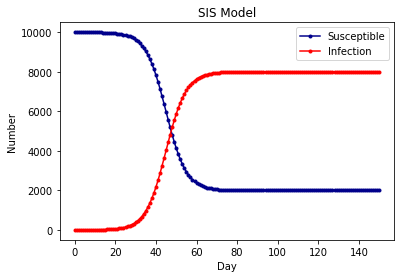

In [7]:
S_0 = N - I_0
# 初始状态下的数组
INI = (S_0,I_0)



def funcSIS(inivalue,_):
    Y = np.zeros(2)
    X = inivalue
    # 易感个体变化
    Y[0] = - (beta * X[0]) / N * X[1] + gamma * X[1]
    # 感染个体变化
    Y[1] = (beta * X[0] * X[1]) / N - gamma * X[1]
    return Y

T_range = np.arange(0,T + 1)

RES = spi.odeint(funcSIS,INI,T_range)

plt.plot(RES[:,0],color = 'darkblue',label = 'Susceptible',marker = '.')
plt.plot(RES[:,1],color = 'red',label = 'Infection',marker = '.')
plt.title('SIS Model')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Number')
plt.show()

### SIR

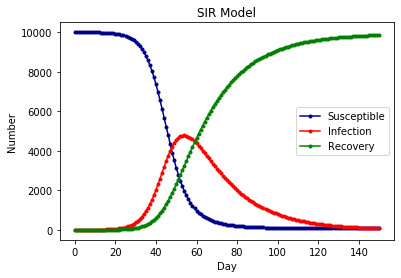

In [3]:
R_0 = 0 
S_0 = N - I_0 - R_0 
INI = (S_0,I_0,R_0) 


def funcSIR(inivalue,_):
    Y = np.zeros(3)
    X = inivalue
    # 易感个体变化
    Y[0] = - (beta * X[0] * X[1]) / N
    # 感染个体变化
    Y[1] = (beta * X[0] * X[1]) / N - gamma * X[1]
    # 治愈个体变化
    Y[2] = gamma * X[1]
    return Y

T_range = np.arange(0,T + 1)

RES = sp.odeint(funcSIR,INI,T_range)


plt.plot(RES[:,0],color = 'darkblue',label = 'Susceptible',marker = '.')
plt.plot(RES[:,1],color = 'red',label = 'Infection',marker = '.')
plt.plot(RES[:,2],color = 'green',label = 'Recovery',marker = '.')
plt.title('SIR Model')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Number')
plt.show()

### SEIR

In [ ]:
# N为人群总数
N = 10000
# β为传染率系数
beta = 0.6
# gamma为恢复率系数
gamma = 0.1
# Te为疾病潜伏期
Te = 14
# I_0为感染者的初始人数
I_0 = 1
# E_0为潜伏者的初始人数
E_0 = 0
# R_0为治愈者的初始人数
R_0 = 0
# S_0为易感者的初始人数
S_0 = N - I_0 - E_0 - R_0
# T为传播时间
T = 150

# INI为初始状态下的数组
INI = (S_0,E_0,I_0,R_0)


def funcSEIR(inivalue,_):
    Y = np.zeros(4)
    X = inivalue
    # 易感个体变化
    Y[0] = - (beta * X[0] * X[2]) / N
    # 潜伏个体变化
    Y[1] = (beta * X[0] * X[2]) / N - X[1] / Te
    # 感染个体变化
    Y[2] = X[1] / Te - gamma * X[2]
    # 治愈个体变化
    Y[3] = gamma * X[2]
    return Y

T_range = np.arange(0,T + 1)

RES = spi.odeint(funcSEIR,INI,T_range)


plt.plot(RES[:,0],color = 'darkblue',label = 'Susceptible',marker = '.')
plt.plot(RES[:,1],color = 'orange',label = 'Exposed',marker = '.')
plt.plot(RES[:,2],color = 'red',label = 'Infection',marker = '.')
plt.plot(RES[:,3],color = 'green',label = 'Recovery',marker = '.')

plt.title('SEIR Model')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Number')
plt.show()